## 3.1 Data profiling

### 3.1.1. Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

sns.set()

### 3.1.2. Import wrangled data

In [2]:
df = pd.read_csv('heart_wrangling.csv')

## 3.2 Identification and creation of features

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHRCat,ST_SlopeCat
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,0


In [4]:
# Since 'MaxHR' and 'ST_slope' have already been converted into numerical forms, we can drop the original columns

df.drop(['MaxHR', 'ST_Slope'], axis=1, inplace = True)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,HeartDisease,MaxHRCat,ST_SlopeCat
0,40,M,ATA,140,289,0,Normal,N,0.0,0,0,0
1,49,F,NAP,160,180,0,Normal,N,1.0,1,0,1
2,37,M,ATA,130,283,0,ST,N,0.0,0,0,0
3,48,F,ASY,138,214,0,Normal,Y,1.5,1,0,1
4,54,M,NAP,150,195,0,Normal,N,0.0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   ExerciseAngina  746 non-null    object 
 8   Oldpeak         746 non-null    float64
 9   HeartDisease    746 non-null    int64  
 10  MaxHRCat        746 non-null    int64  
 11  ST_SlopeCat     746 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 70.1+ KB


This data contains only two continuous numerical variables, i.e. 'RestingBP' and 'Cholesterol'. All other variables are categorical in nature. This means a classification algorithm may work the best to predict heart failure.

In [7]:
# Write a function to convert category names into numeric indices, This function takes two inputs - dataframe and column name.

def cat_converter(df, column):
    
    # Find unique values in the column
    array = df[column].unique()
    
    # Create a dictionary of unique values and corresponding numbers for column mapping
    dict = {}
    i = 0
    for item in array:
        dict[item] = i
        i += 1
    
    # Create a new column in dataframe by mapping the dictionary onto original column
    df[column+'Cat'] = df[column].map(dict)
    
    # Drop the original column from dataframe
    df.drop(column, axis=1, inplace=True)

In [8]:
# Convert 'ChestPainType' into numerical values.

chestpain_order = df['ChestPainType'].unique()
cat_converter(df, 'ChestPainType')

In [9]:
# Convert 'Sex' to numerical values

sex_order = df['Sex'].unique()
cat_converter(df, 'Sex')

In [10]:
# Convert 'RestingECG' to numerical values

restingecg_order = df['RestingECG'].unique()
cat_converter(df, 'RestingECG')

In [11]:
# Convert 'ExerciseAngina' to numerical values

angina_order = df['ExerciseAngina'].unique()
cat_converter(df, 'ExerciseAngina')

In [12]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,Oldpeak,HeartDisease,MaxHRCat,ST_SlopeCat,ChestPainTypeCat,SexCat,RestingECGCat,ExerciseAnginaCat
0,40,140,289,0,0.0,0,0,0,0,0,0,0
1,49,160,180,0,1.0,1,0,1,1,1,0,0
2,37,130,283,0,0.0,0,0,0,0,0,1,0
3,48,138,214,0,1.5,1,0,1,2,1,0,1
4,54,150,195,0,0.0,0,0,0,1,0,0,0


In [13]:
# 'Oldpeak' is ST depression induced by exercise relative to rest. It appears that both positive and negative values indicate
# health issues that may lead to heart faiure. Since we are not certain about the critical Oldpeak values/range, we will keep
# the column as it is.

df['Oldpeak'].value_counts()

 0.0    317
 1.0     68
 2.0     58
 1.5     39
 3.0     23
 1.2     22
 0.2     19
 1.4     15
 1.8     15
 0.8     15
 0.6     14
 1.6     13
 0.5     12
 2.5     11
 0.1     10
 0.4     10
 0.3      9
 4.0      8
 1.9      7
 2.8      6
 2.6      6
 1.3      5
 1.7      5
 2.2      4
 3.6      4
 1.1      4
 0.9      3
 2.4      3
 3.4      3
 2.3      2
 3.5      2
 4.2      2
 3.2      2
 4.4      1
 5.0      1
 0.7      1
-0.1      1
 2.9      1
 6.2      1
 3.8      1
 5.6      1
 3.1      1
 2.1      1
Name: Oldpeak, dtype: int64

In [14]:
## Similarly, we will keep 'RestingBP' and 'Cholesterol'columns as they are since they consist of a range of distinct values
## and we are not certain how should these values be grouped

In [15]:
# 'Age' column also consists of a range of numbers, but we had grouped 'MaxHR' values based on age groups in 'data wrangling'
# assignment. Such grouping intuitively makes sense: the risk of heart failure between a 34 and 36 year olds may not be significant,
# but such risk may be large between 40 and 65 year olds.

# Create function to assign patients their age groups

def age_converter(age):
    if age <= 25:
        return 0
    elif age <= 33:
        return 1
    elif age <= 38:
        return 2
    elif age <= 43:
        return 3
    elif age <= 48:
        return 4
    elif age <= 53:
        return 5
    elif age <= 58:
        return 6
    elif age <= 63:
        return 7
    elif age <= 68:
        return 8
    else:
        return 9

In [16]:
# Create a new column of patients' age category

df['AgeCat'] = df['Age'].apply(lambda x: age_converter(x))

# Drop the original column from dataframe

df.drop('Age', axis=1, inplace=True)

In [17]:
df.head()

,RestingBP,Cholesterol,FastingBS,Oldpeak,HeartDisease,MaxHRCat,ST_SlopeCat,ChestPainTypeCat,SexCat,RestingECGCat,ExerciseAnginaCat,AgeCat
0,140,289,0,0.0,0,0,0,0,0,0,0,3
1,160,180,0,1.0,1,0,1,1,1,0,0,5
2,130,283,0,0.0,0,0,0,0,0,1,0,2
3,138,214,0,1.5,1,0,1,2,1,0,1,4
4,150,195,0,0.0,0,0,0,1,0,0,0,6


In [18]:
# Rearrange the columns so that the dependent variable 'HeartDisease' is located in the right-most column.

df.columns.values

array(['RestingBP', 'Cholesterol', 'FastingBS', 'Oldpeak', 'HeartDisease',
       'MaxHRCat', 'ST_SlopeCat', 'ChestPainTypeCat', 'SexCat',
       'RestingECGCat', 'ExerciseAnginaCat', 'AgeCat'], dtype=object)

In [19]:
cols = ['AgeCat', 'SexCat', 'RestingBP', 'Cholesterol', 'FastingBS', 'Oldpeak', 'MaxHRCat', 'ST_SlopeCat', 'ChestPainTypeCat', 
        'RestingECGCat', 'ExerciseAnginaCat', 'HeartDisease']

df = df[cols]

In [20]:
df.head()

,AgeCat,SexCat,RestingBP,Cholesterol,FastingBS,Oldpeak,MaxHRCat,ST_SlopeCat,ChestPainTypeCat,RestingECGCat,ExerciseAnginaCat,HeartDisease
0,3,0,140,289,0,0.0,0,0,0,0,0,0
1,5,1,160,180,0,1.0,0,1,1,0,0,1
2,2,0,130,283,0,0.0,0,0,0,1,0,0
3,4,1,138,214,0,1.5,0,1,2,0,1,1
4,6,0,150,195,0,0.0,0,0,1,0,0,0


## 3.3 Explore data relationships

### 3.3.1. Correlation between variables

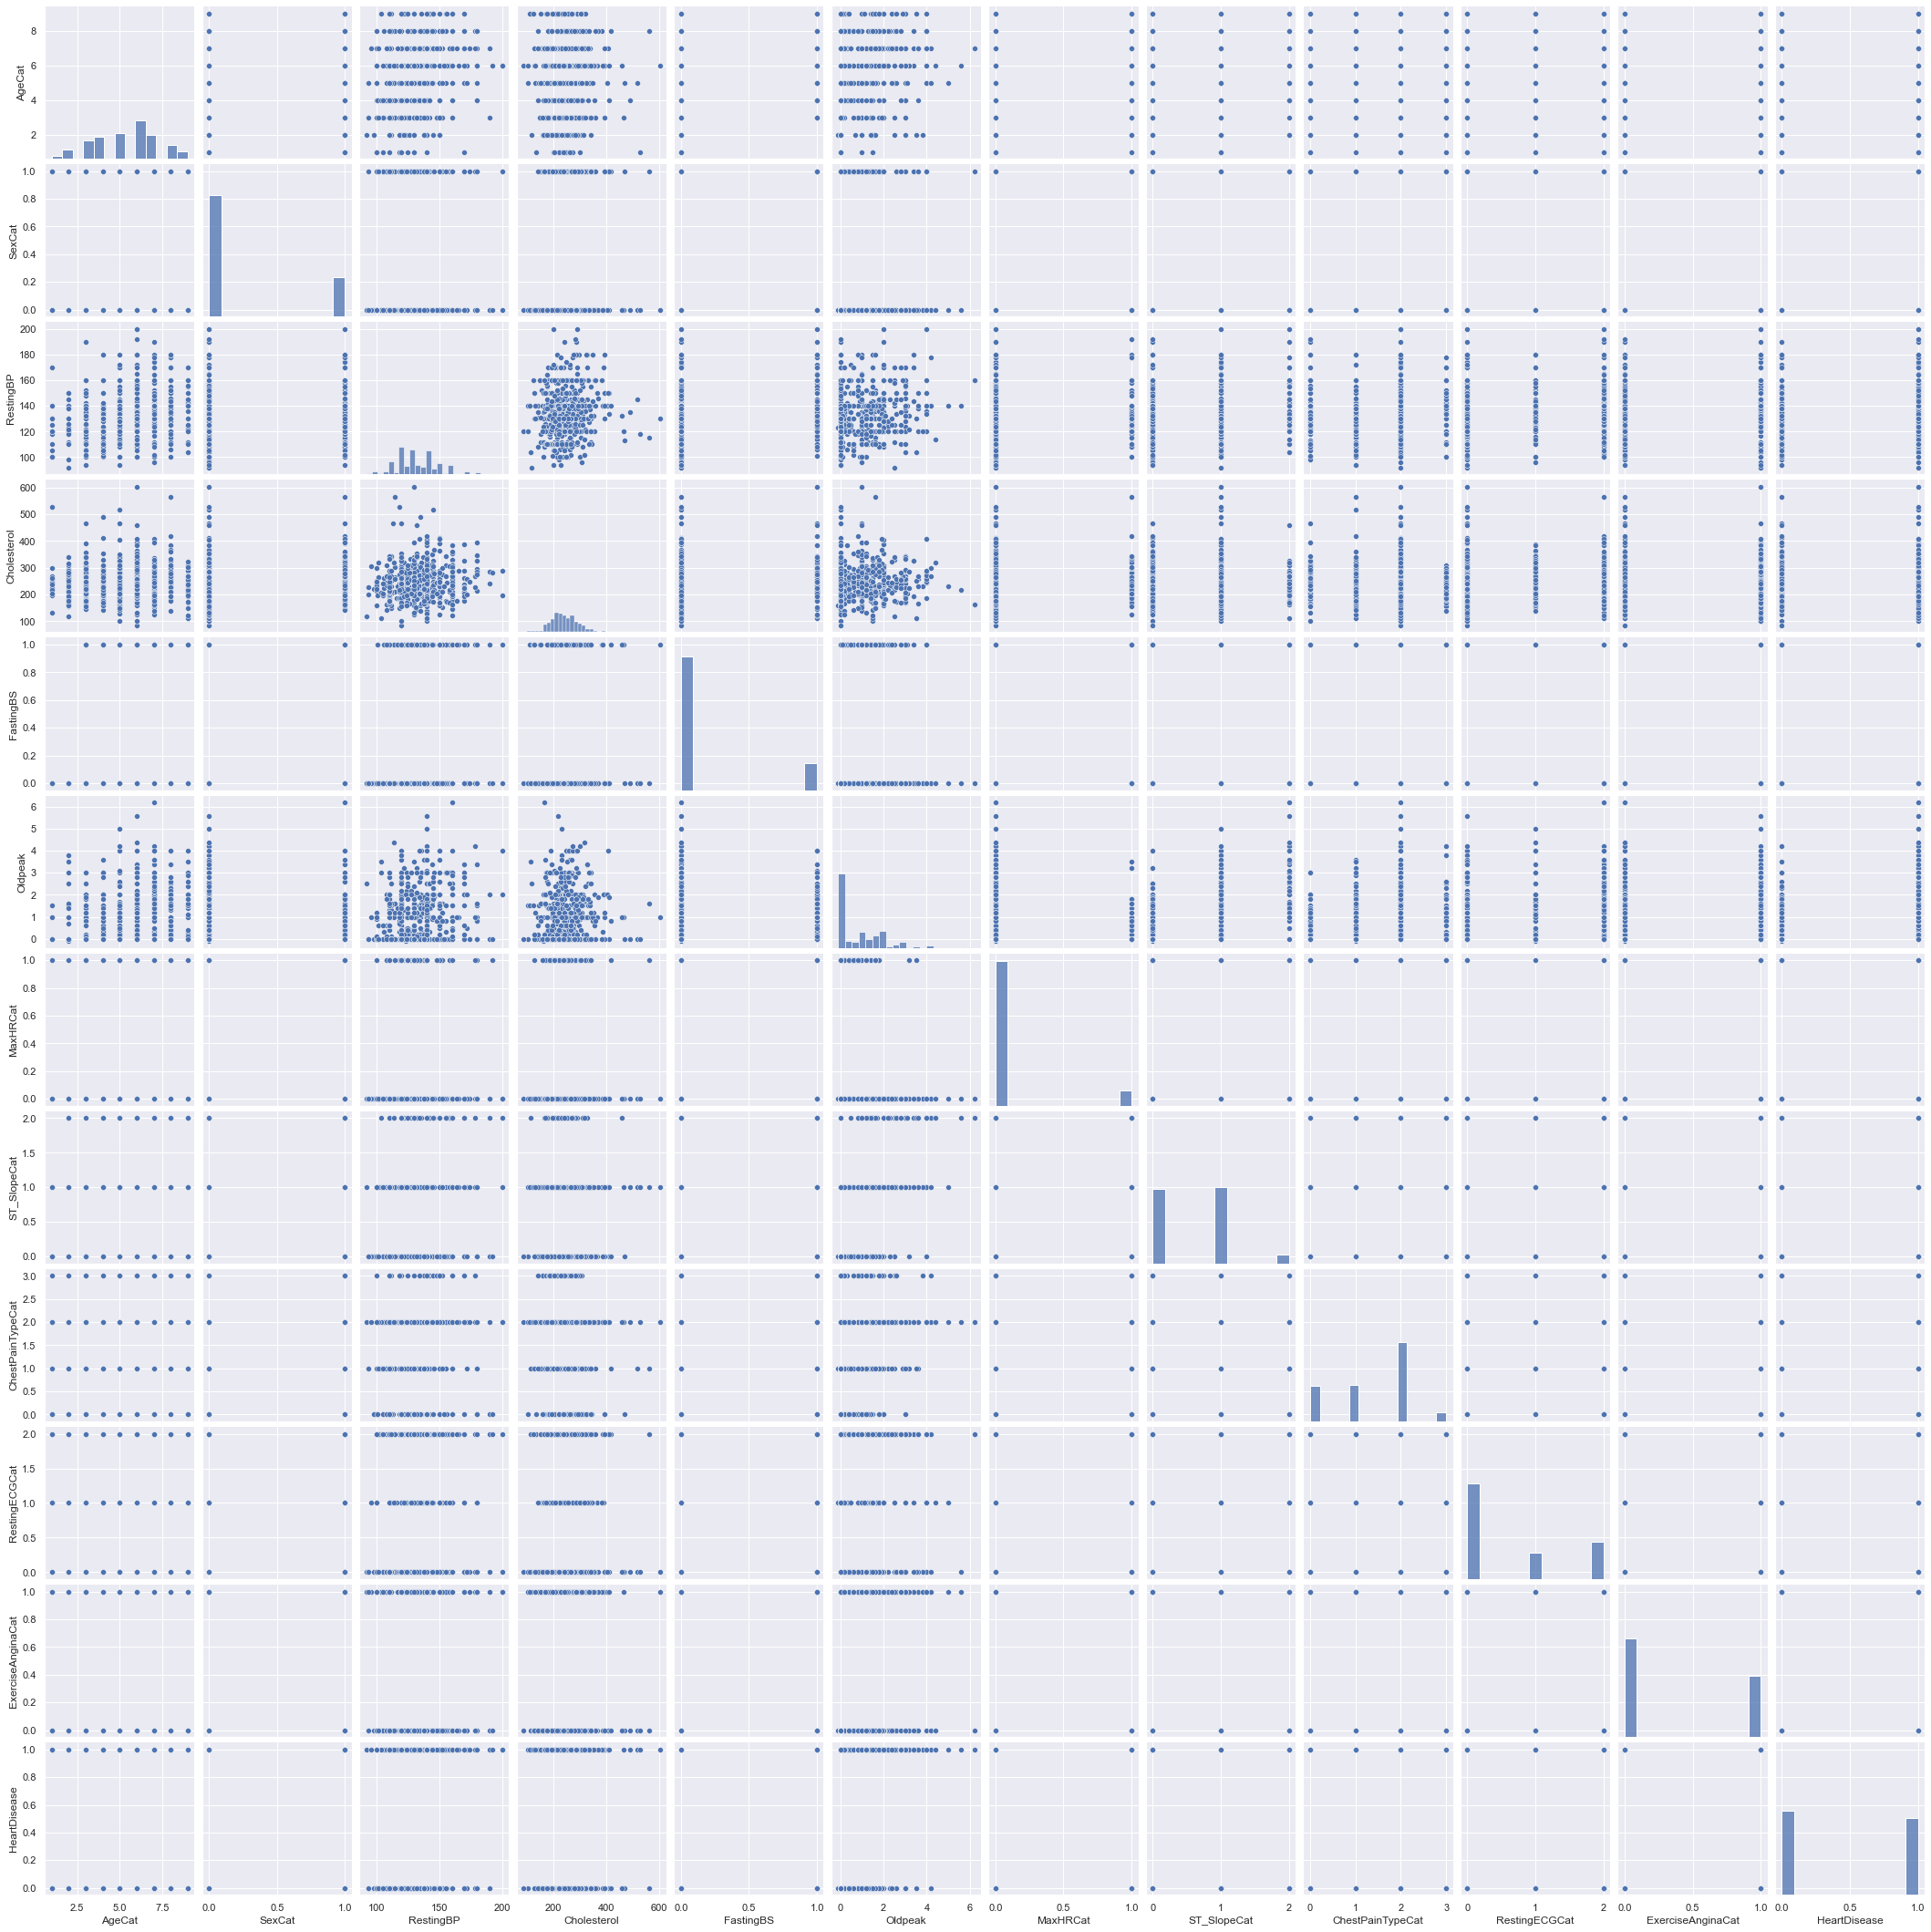

In [21]:
# Plot pairplot to realize relationships between various columns in detail

sns.pairplot(df)

It is evident from the pair plots that linear regression is not a suitable technique to analyze this data set.
Since majority of the features are categorized, we can treat this data as a classification problem.

### 3.3.2. 'HeartDisease' and other features

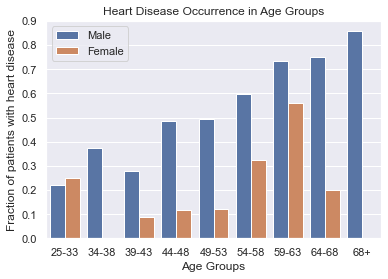

In [22]:
# Age, Sex, and heart disease

age_order = ['25-33', '34-38', '39-43', '44-48', '49-53', '54-58', '59-63', '64-68','68+']
g = sns.barplot(x='AgeCat', y='HeartDisease', hue='SexCat', data=df, ci=None)
g.set_xticklabels(age_order)
g.set_title('Heart Disease Occurrence in Age Groups')
g.set_xlabel('Age Groups')
g.set_ylabel('Fraction of patients with heart disease')
plt.legend(['Male','Female'])
plt.show();

Men and women show different trends in this heart disease study. The fraction of men with a heart disease steadily goes up with age. However,less % of women have a heart disease than men across all age groups. Women in age group 59-63 shows the highest % of heart disease detection.

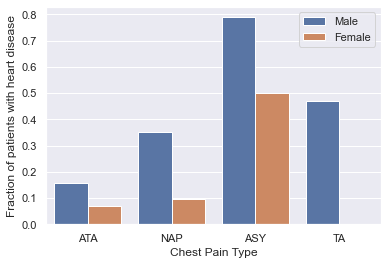

In [23]:
# Chest pain and heart disease

g = sns.barplot(x='ChestPainTypeCat', y='HeartDisease', hue='SexCat', data=df, ci=None)
g.set_xticklabels(chestpain_order)
#g.set_title('Heart Disease Occurrence in Age Groups')
g.set_xlabel('Chest Pain Type')
g.set_ylabel('Fraction of patients with heart disease')
plt.legend(['Male','Female'])
plt.show();

Men show higher % of heart disease detection across all chest pain categories. The fraction is highest for asympomatic patients, both males and females. This means a large number of patients who did not show any chest pain were diagnosed with a heart disease. Patients with atypical angina (ATA) showed the lowest % of heart disease detection.

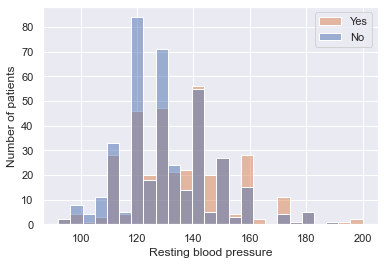

In [24]:
# Resting blood pressure and heart disease

g = sns.histplot(data=df, x='RestingBP', hue='HeartDisease')
#g.set_xticklabels(chestpain_order)
#g.set_title('Heart Disease Occurrence in Age Groups')
g.set_xlabel('Resting blood pressure')
g.set_ylabel('Number of patients')
plt.legend(['Yes','No'])
plt.show();

It seems that more patients with more patients with blood pressure values < 150 were diagnosed with heart disease in this study. This trend indicates a week relationship between resting blood pressure and heart disease detection.

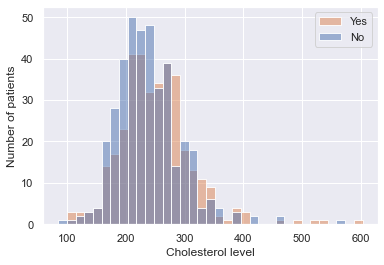

In [25]:
# Cholesterol level and heart disease

g = sns.histplot(data=df, x='Cholesterol', hue='HeartDisease')
#g.set_xticklabels(chestpain_order)
#g.set_title('Heart Disease Occurrence in Age Groups')
g.set_xlabel('Cholesterol level')
g.set_ylabel('Number of patients')
plt.legend(['Yes','No'])
plt.show();

Many patients with a heart disease show cholesterol levels < 240 (borderline high). However, as cholesterol levels increase, patients are more likely to be diagnosed with a heart disease. A significant correlation between cholesterol level and heart disease diagnosis justifies the earlier decision of not using patients' medical records with missing cholesterol levels.

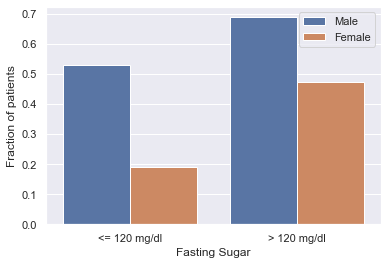

In [26]:
# Fasting blood sugar and heart disease

g = sns.barplot(x='FastingBS', y='HeartDisease', hue='SexCat', data=df, ci=None)
g.set_xticklabels(['<= 120 mg/dl', '> 120 mg/dl'])
#g.set_title('Heart Disease Occurrence in Age Groups')
g.set_xlabel('Fasting Sugar')
g.set_ylabel('Fraction of patients')
plt.legend(['Male', 'Female'])
plt.show();

Nearly 50% of males and 20% of females with blood sugar level <= 120 had heart disease detected. On the other hand, nearly 70% of men and 455 of women with blood sugar > 120 (diabetic) had heart disease detected.

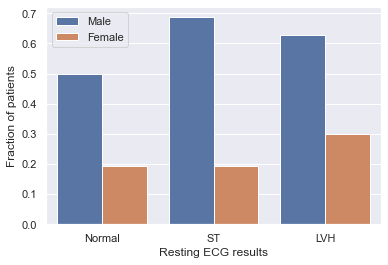

In [27]:
# Resting ECG and heart disease

g = sns.barplot(x='RestingECGCat', y='HeartDisease', hue='SexCat', data=df, ci=None)
g.set_xticklabels(restingecg_order)
#g.set_title('Heart Disease Occurrence in Age Groups')
g.set_xlabel('Resting ECG results')
g.set_ylabel('Fraction of patients')
plt.legend(['Male', 'Female'])
plt.show();

ST and LVH indicate abnormalities in the ECG. Patients with ECG abnormality show a greater percentage of heart disease detection. However, the fraction of females with heart disease is significantly lower than males across every ECG result type.

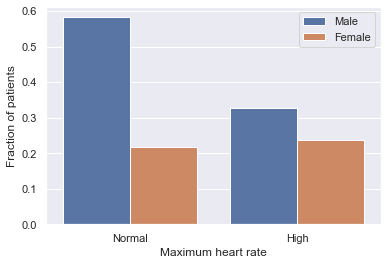

In [28]:
# Maximum heart rate and heart disease

g = sns.barplot(x='MaxHRCat', y='HeartDisease', hue='SexCat', data=df, ci=None)
g.set_xticklabels(['Normal', 'High'])
#g.set_title('Heart Disease Occurrence in Age Groups')
g.set_xlabel('Maximum heart rate')
g.set_ylabel('Fraction of patients')
plt.legend(['Male', 'Female'])
plt.show();

More than 50% of males with maximum heart rate within normal range had heart disease detected. On the other hand, about 32% of males with maximum heart rate higher than the normal range were diagnosed with a heart disease. In contrast, about 22-24% of females were diagnosed with a heart disease irrespective on their maximum heart rate.

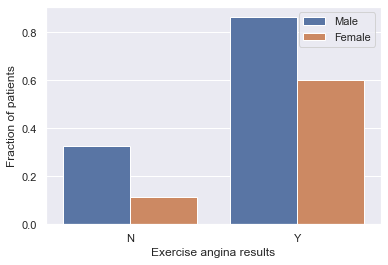

In [29]:
# Exercise angina and heart disease

g = sns.barplot(x='ExerciseAnginaCat', y='HeartDisease', hue='SexCat', data=df, ci=None)
g.set_xticklabels(angina_order)
#g.set_title('Heart Disease Occurrence in Age Groups')
g.set_xlabel('Exercise angina results')
g.set_ylabel('Fraction of patients')
plt.legend(['Male', 'Female'])
plt.show();

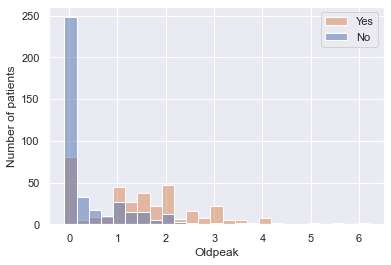

In [30]:
# Cholesterol level and heart disease

g = sns.histplot(data=df, x='Oldpeak', hue='HeartDisease', bins=25)
#g.set_xticklabels(chestpain_order)
#g.set_title('Heart Disease Occurrence in Age Groups')
g.set_xlabel('Oldpeak')
g.set_ylabel('Number of patients')
plt.legend(['Yes','No'])
plt.show();

Nearly 50% of total patients' records showed either no ST depression or small ST depression (Oldpeak). At high oldpeak values (> 1) patients are more likely to be diagnosed with a heart disease.

### 3.3.3 Feature Selection

In [31]:
# Determine the strength of correlation between various variables and output feature ('HeartDisease') using 'SelectKBest'

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [32]:
best_features = SelectKBest(k=10 )
fit = best_features.fit(X,y)

In [33]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [34]:
feature_scores_K = pd.concat([df_columns, df_scores], axis=1)
feature_scores_K.columns = ['Feature', 'Score_K']
feature_scores_K

,Feature,Score_K
0,AgeCat,68.666751
1,SexCat,69.754525
2,RestingBP,23.020309
3,Cholesterol,8.113851
4,FastingBS,19.696078
5,Oldpeak,242.364279
6,MaxHRCat,9.825863
7,ST_SlopeCat,412.729588
8,ChestPainTypeCat,180.665388
9,RestingECGCat,9.668106


In [35]:
# Determine the strength of correlation between various variables and output feature using 'ExtraTreesClassifier'

model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

array([0.07000742, 0.05948696, 0.08173676, 0.08002411, 0.02000875,
       0.11652294, 0.02458733, 0.23469157, 0.11294474, 0.04392416,
       0.15606527])

In [36]:
feature_importances = pd.DataFrame(model.feature_importances_)

In [37]:
feature_scores_tree = pd.concat([df_columns,feature_importances], axis=1)
feature_scores_tree.columns = ['Feature','Score_tree']
feature_scores_tree

,Feature,Score_tree
0,AgeCat,0.070007
1,SexCat,0.059487
2,RestingBP,0.081737
3,Cholesterol,0.080024
4,FastingBS,0.020009
5,Oldpeak,0.116523
6,MaxHRCat,0.024587
7,ST_SlopeCat,0.234692
8,ChestPainTypeCat,0.112945
9,RestingECGCat,0.043924


In [38]:
feature_scores_K['Score_tree'] = feature_scores_tree['Score_tree']
feature_scores_K.sort_values(['Score_K'], ascending=False)

,Feature,Score_K,Score_tree
7,ST_SlopeCat,412.729588,0.234692
10,ExerciseAnginaCat,325.766789,0.156065
5,Oldpeak,242.364279,0.116523
8,ChestPainTypeCat,180.665388,0.112945
1,SexCat,69.754525,0.059487
0,AgeCat,68.666751,0.070007
2,RestingBP,23.020309,0.081737
4,FastingBS,19.696078,0.020009
6,MaxHRCat,9.825863,0.024587
9,RestingECGCat,9.668106,0.043924


Feature impact scores determined using two methods (SelectKBest and ExtraTressClassifier) are in a different order for features with lower degree of impact. However, both methods have the same 4 features with highest degree of importance. These features are: ST_Slope, ExerciseAngina, Oldpeak, and ChestPainType.